# LOAD package

In [1]:
from astropy.io import fits
import numpy as np
from multiprocessing import Process
from sklearn.neighbors import BallTree
from astropy.cosmology import FlatLambdaCDM
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from astropy.table import Table,Column,vstack
from astropy.io import ascii
import os
import matplotlib.colors as mcolors

In [2]:
from astropy.coordinates import SkyCoord
from astropy.cosmology import FlatLambdaCDM,z_at_value
cosmo = FlatLambdaCDM(H0 = 67.74,Om0 = 0.3089,Ob0 = 0.0486)
from scipy.spatial import cKDTree
import astropy.units as u
import pandas as pd

用topcat拼接cos1和cosmos 得到mass

In [3]:
cosmos = Table.read("/home/kunxu/DECaLS/complete/COSMOS2020_R1/COSMOS2020_FARMER_R1_v2.0.fits")

In [34]:
cosmos.columns

<TableColumns names=('lp_zPDF_1','bayes.stellar.m_star','HSC_z_MAG_1','ALPHA_J2000_1','DELTA_J2000_1','lp_type_1','HSC_g_MAG_1','HSC_r_MAG_1','ID','ALPHA_J2000_2','DELTA_J2000_2','X_MODEL','Y_MODEL','ERRX_MODEL','ERRY_MODEL','ALPHA_DETECTION','DELTA_DETECTION','FARMER_ID','N_GROUP','FLAG_HSC','FLAG_SUPCAM','FLAG_UDEEP','FLAG_UVISTA','FLAG_COMBINED','EBV_MW','CFHT_u_FLUX','CFHT_u_FLUXERR','CFHT_u_MAG','CFHT_u_MAGERR','CFHT_u_CHISQ','CFHT_u_DRIFT','CFHT_u_VALID','CFHT_ustar_FLUX','CFHT_ustar_FLUXERR','CFHT_ustar_MAG','CFHT_ustar_MAGERR','CFHT_ustar_CHISQ','CFHT_ustar_DRIFT','CFHT_ustar_VALID','HSC_g_FLUX','HSC_g_FLUXERR','HSC_g_MAG_2','HSC_g_MAGERR','HSC_g_CHISQ','HSC_g_DRIFT','HSC_g_VALID','HSC_r_FLUX','HSC_r_FLUXERR','HSC_r_MAG_2','HSC_r_MAGERR','HSC_r_CHISQ','HSC_r_DRIFT','HSC_r_VALID','HSC_i_FLUX','HSC_i_FLUXERR','HSC_i_MAG','HSC_i_MAGERR','HSC_i_CHISQ','HSC_i_DRIFT','HSC_i_VALID','HSC_z_FLUX','HSC_z_FLUXERR','HSC_z_MAG_2','HSC_z_MAGERR','HSC_z_CHISQ','HSC_z_DRIFT','HSC_z_VALID','HSC

In [16]:
redshift = cosmos['lp_zBEST']
g = cosmos['HSC_g_MAG']
z = cosmos['HSC_z_MAG'] 
i = cosmos['HSC_i_MAG']
mass = cosmos['lp_mass_best']

(18.0, 26.0)

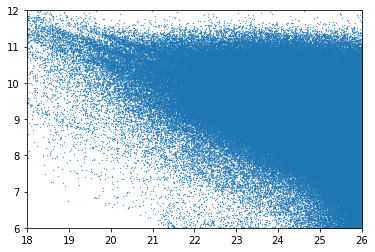

In [77]:
plt.scatter(i,mass,s=0.1)
plt.ylim(6,12)
plt.xlim(18,26)

In [9]:
np.unique(redshift)

0.0
0.01
0.0101
0.0102
0.0103
0.0104
0.0105
0.0106
0.0107
0.0108
0.0109


In [17]:
index = ((g>0)&(z>0)&(i>0)&(redshift>0.3)&(redshift<0.5))
# index = ((g>0)&(z>0)&(i>0)&(redshift>0.5)&(redshift<0.7))


redshift = redshift[index]
g = g[index]
z = z[index]
i = i[index]
g_z = g-z
mass = mass[index]

In [99]:
np.unique(mass)

5.20678
5.24492
5.28141
5.28874
5.29447
5.36328
5.3787
5.44383
5.44858
5.46473
5.47111


In [30]:
np.unique(i)

18.04438337684992
18.05922508643897
18.090203134941625
18.21014244670628
18.22679016798457
18.227325184774934
18.246332721049924
18.2512047912832
18.259635757112186
18.27384200819695
18.303771667147366


In [15]:
np.unique(g)

19.804687561342448
19.866485984952014
20.311025308228302
20.38483613636762
20.471606798162888
20.574504652843043
20.61267293964551
20.70123263667088
20.723436965834086
20.724438649065988
20.756558463815598


(array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
         1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 9.000e+00, 2.000e+01,
         1.800e+01, 2.600e+01, 6.000e+00, 0.000e+00],
        [1.000e+00, 6.000e+00, 5.100e+01, 1.630e+02, 3.010e+02, 2.350e+02,
         2.220e+02, 3.220e+02, 2.010e+02, 5.000e+00],
        [8.000e+00, 6.500e+01, 6.600e+02, 1.546e+03, 8.800e+02, 5.020e+02,
         4.780e+02, 5.630e+02, 2.530e+02, 1.200e+01],
        [3.700e+01, 3.460e+02, 2.512e+03, 3.456e+03, 1.095e+03, 4.360e+02,
         3.480e+02, 2.930e+02, 7.300e+01, 8.000e+00],
        [1.910e+02, 1.036e+03, 4.452e+03, 4.777e+03, 1.416e+03, 5.570e+02,
         3.910e+02, 2.480e+02, 6.600e+01, 1.900e+01],
        [1.309e+03, 2.733e+03, 5.168e+03, 4.639e+03, 1.998e+03, 8.580e+02,
         5.320e+02, 3.

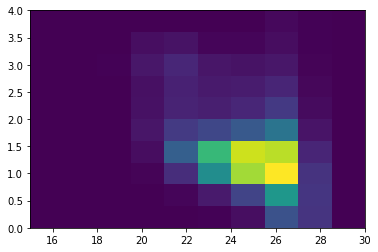

In [16]:
plt.hist2d(z,g-z,range = [[15,30],[0,4]])

In [18]:
ibins = np.array([18,19,20,21,22,23])
# ibins = np.array([20,20.5,21,21.5,22,22.5])
frac = np.zeros(5)
err = np.zeros(5)
for j in range(5):
    index = ((i>ibins[j])&(i<ibins[j+1]))
    temp = g_z[index]
    print(temp.shape)
    frac_each = np.zeros(10000)
    np.random.seed(10000)
    for k in range(10000):
        index_temp = np.random.choice(len(temp),size = len(temp),replace = True)
        g_z_temp = temp[index_temp]
        frac_each[k] = len(g_z_temp[g_z_temp>2])/len(g_z_temp)
    frac[j] = np.mean(frac_each)
    err[j] = np.std(frac_each,ddof =1)
    

(105,)
(604,)
(1574,)
(2494,)
(3472,)


In [83]:
frac_3_5 = np.array([0.54390439, 0.41586204, 0.33110044, 0.23787636, 0.15935965])
err_3_5 = np.array([0.01946919, 0.01617576, 0.01412671, 0.01153622, 0.00929114])

In [90]:
frac_5_7 = np.array([0.66937068, 0.62289616, 0.48530349, 0.39816868, 0.3073236 ])
err_5_7 = np.array([0.02875124, 0.02019732, 0.01517928, 0.0127247 , 0.00998754])

Text(0.5, 1.0, '$Redshift: \\ 0.5 \\ - \\ 0.7$')

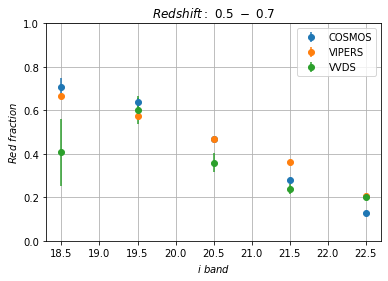

In [19]:
ibin0 = 0.5*(ibins[1:]+ibins[:-1])
# plt.scatter(ibin0,frac_noweight,color ='red')
plt.errorbar(ibin0,frac,err,fmt = 'o',label = 'COSMOS')
plt.errorbar(ibin0,vipers,vipers_err,fmt = 'o',label = 'VIPERS')
plt.errorbar(ibin0,vvds,vvds_err,fmt = 'o',label = 'VVDS')
plt.legend()
# plt.xlim(20,22.5)
plt.ylim(0,1)
plt.grid()
plt.xlabel("$i\  band$")
plt.ylabel("$Red\  fraction$")
plt.title("$Redshift: \ 0.5 \ - \ 0.7$")

In [7]:
vipers = np.array([0.66555355, 0.57535585, 0.46945998, 0.36189745, 0.20743706])
vipers_err = np.array([0.01115256, 0.00787066, 0.00682245, 0.00610394, 0.00685161])
vvds = np.array([0.40659597, 0.60190757, 0.35827007, 0.23690003, 0.19948793])
vvds_err = np.array([0.07954697, 0.06280883, 0.04037865, 0.03145562, 0.02557611])

Text(0.5, 1.0, '$Redshift: \\ 0.3 - 0.5$')

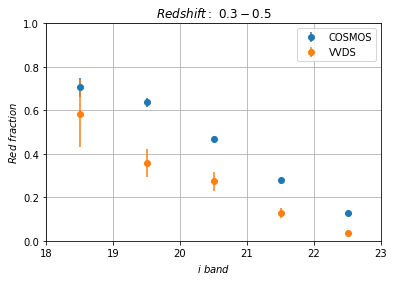

In [20]:
ibin0 = 0.5*(ibins[1:]+ibins[:-1])
# plt.scatter(ibin0,frac_noweight,color ='red')
plt.errorbar(ibin0,frac,err,fmt='o',label = 'COSMOS')
# plt.scatter(ibin0,vipers,label = 'VIPERS')
plt.errorbar(ibin0,vvds_3_5,vvds_err,fmt = 'o',label = 'VVDS')
plt.legend()
plt.xlim(18,23)
plt.ylim(0,1)
plt.grid()
plt.xlabel("$i\  band$")
plt.ylabel("$Red\  fraction$")
plt.title("$Redshift: \ 0.3 - 0.5$")

In [14]:
vvds_3_5 = np.array([0.58493755, 0.35744224, 0.27285065, 0.12912561, 0.03394988])
vvds_err = np.array([0.1544493 , 0.06609475, 0.04372101, 0.02311198, 0.00990667])

Text(0, 0.5, '$Red\\  fraction$')

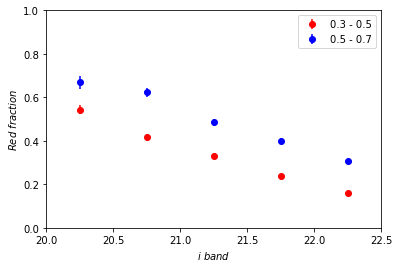

In [94]:
ibin0 = 0.5*(ibins[1:]+ibins[:-1])
plt.errorbar(ibin0,frac_3_5,err_3_5,color ='red',fmt = 'o',label = '0.3 - 0.5')
plt.errorbar(ibin0,frac_5_7,err_5_7,color = 'blue',fmt = 'o',label = '0.5 - 0.7')
plt.legend()
plt.xlim(20,22.5)
plt.ylim(0,1)
plt.xlabel("$i\  band$")
plt.ylabel("$Red\  fraction$")

# mass fraction

In [21]:
# cosmos = Table.read("/home/kunxu/DECaLS/complete/COSMOS2020_R1/COSMOS2020_FARMER_R1_v2.0.fits")
# cos1 = Table.read("/home/kunxu/DECaLS/complete/COSMOS/COSMOS_final.fits")
cosmos = Table.read("./cosmos.fits")

In [80]:
10**(26 - 0.4 *(cosmos['HSC_g_MAG_2']+48.6))

masked_array(data=[0.00014423451299205617, 4.079535657325392e-05,
                   0.0013767611485778469, ..., 6.194078969527406e-05,
                   3.668310365886511e-05, 1.5480274181721815e-05],
             mask=[False, False, False, ..., False, False, False],
       fill_value=1e+20)

In [87]:
cosmos.columns

<TableColumns names=('lp_zPDF_1','bayes.stellar.m_star','HSC_z_MAG_1','ALPHA_J2000_1','DELTA_J2000_1','lp_type_1','HSC_g_MAG_1','HSC_r_MAG_1','ID','ALPHA_J2000_2','DELTA_J2000_2','X_MODEL','Y_MODEL','ERRX_MODEL','ERRY_MODEL','ALPHA_DETECTION','DELTA_DETECTION','FARMER_ID','N_GROUP','FLAG_HSC','FLAG_SUPCAM','FLAG_UDEEP','FLAG_UVISTA','FLAG_COMBINED','EBV_MW','CFHT_u_FLUX','CFHT_u_FLUXERR','CFHT_u_MAG','CFHT_u_MAGERR','CFHT_u_CHISQ','CFHT_u_DRIFT','CFHT_u_VALID','CFHT_ustar_FLUX','CFHT_ustar_FLUXERR','CFHT_ustar_MAG','CFHT_ustar_MAGERR','CFHT_ustar_CHISQ','CFHT_ustar_DRIFT','CFHT_ustar_VALID','HSC_g_FLUX','HSC_g_FLUXERR','HSC_g_MAG_2','HSC_g_MAGERR','HSC_g_CHISQ','HSC_g_DRIFT','HSC_g_VALID','HSC_r_FLUX','HSC_r_FLUXERR','HSC_r_MAG_2','HSC_r_MAGERR','HSC_r_CHISQ','HSC_r_DRIFT','HSC_r_VALID','HSC_i_FLUX','HSC_i_FLUXERR','HSC_i_MAG','HSC_i_MAGERR','HSC_i_CHISQ','HSC_i_DRIFT','HSC_i_VALID','HSC_z_FLUX','HSC_z_FLUXERR','HSC_z_MAG_2','HSC_z_MAGERR','HSC_z_CHISQ','HSC_z_DRIFT','HSC_z_VALID','HSC

In [86]:
cosmos[:2]

lp_zPDF_1,bayes.stellar.m_star,HSC_z_MAG_1,ALPHA_J2000_1,DELTA_J2000_1,lp_type_1,HSC_g_MAG_1,HSC_r_MAG_1,ID,ALPHA_J2000_2,DELTA_J2000_2,X_MODEL,Y_MODEL,ERRX_MODEL,ERRY_MODEL,ALPHA_DETECTION,DELTA_DETECTION,FARMER_ID,N_GROUP,FLAG_HSC,FLAG_SUPCAM,FLAG_UDEEP,FLAG_UVISTA,FLAG_COMBINED,EBV_MW,CFHT_u_FLUX,CFHT_u_FLUXERR,CFHT_u_MAG,CFHT_u_MAGERR,CFHT_u_CHISQ,CFHT_u_DRIFT,CFHT_u_VALID,CFHT_ustar_FLUX,CFHT_ustar_FLUXERR,CFHT_ustar_MAG,CFHT_ustar_MAGERR,CFHT_ustar_CHISQ,CFHT_ustar_DRIFT,CFHT_ustar_VALID,HSC_g_FLUX,HSC_g_FLUXERR,HSC_g_MAG_2,HSC_g_MAGERR,HSC_g_CHISQ,HSC_g_DRIFT,HSC_g_VALID,HSC_r_FLUX,HSC_r_FLUXERR,HSC_r_MAG_2,HSC_r_MAGERR,HSC_r_CHISQ,HSC_r_DRIFT,HSC_r_VALID,HSC_i_FLUX,HSC_i_FLUXERR,HSC_i_MAG,HSC_i_MAGERR,HSC_i_CHISQ,HSC_i_DRIFT,HSC_i_VALID,HSC_z_FLUX,HSC_z_FLUXERR,HSC_z_MAG_2,HSC_z_MAGERR,HSC_z_CHISQ,HSC_z_DRIFT,HSC_z_VALID,HSC_y_FLUX,HSC_y_FLUXERR,HSC_y_MAG,HSC_y_MAGERR,HSC_y_CHISQ,HSC_y_DRIFT,HSC_y_VALID,UVISTA_Y_FLUX,UVISTA_Y_FLUXERR,UVISTA_Y_MAG,UVISTA_Y_MAGERR,UVISTA_Y_CHISQ,UVISTA_Y_DRIFT,UVISTA_Y_VALID,UVISTA_J_FLUX,UVISTA_J_FLUXERR,UVISTA_J_MAG,UVISTA_J_MAGERR,UVISTA_J_CHISQ,UVISTA_J_DRIFT,UVISTA_J_VALID,UVISTA_H_FLUX,UVISTA_H_FLUXERR,UVISTA_H_MAG,UVISTA_H_MAGERR,UVISTA_H_CHISQ,UVISTA_H_DRIFT,UVISTA_H_VALID,UVISTA_Ks_FLUX,UVISTA_Ks_FLUXERR,UVISTA_Ks_MAG,UVISTA_Ks_MAGERR,UVISTA_Ks_CHISQ,UVISTA_Ks_DRIFT,UVISTA_Ks_VALID,UVISTA_NB118_FLUX,UVISTA_NB118_FLUXERR,UVISTA_NB118_MAG,UVISTA_NB118_MAGERR,UVISTA_NB118_CHISQ,UVISTA_NB118_DRIFT,UVISTA_NB118_VALID,SC_IB427_FLUX,SC_IB427_FLUXERR,SC_IB427_MAG,SC_IB427_MAGERR,SC_IB427_CHISQ,SC_IB427_DRIFT,SC_IB427_VALID,SC_IB464_FLUX,SC_IB464_FLUXERR,SC_IB464_MAG,SC_IB464_MAGERR,SC_IB464_CHISQ,SC_IB464_DRIFT,SC_IB464_VALID,SC_IA484_FLUX,SC_IA484_FLUXERR,SC_IA484_MAG,SC_IA484_MAGERR,SC_IA484_CHISQ,SC_IA484_DRIFT,SC_IA484_VALID,SC_IB505_FLUX,SC_IB505_FLUXERR,SC_IB505_MAG,SC_IB505_MAGERR,SC_IB505_CHISQ,SC_IB505_DRIFT,SC_IB505_VALID,SC_IA527_FLUX,SC_IA527_FLUXERR,SC_IA527_MAG,SC_IA527_MAGERR,SC_IA527_CHISQ,SC_IA527_DRIFT,SC_IA527_VALID,SC_IB574_FLUX,SC_IB574_FLUXERR,SC_IB574_MAG,SC_IB574_MAGERR,SC_IB574_CHISQ,SC_IB574_DRIFT,SC_IB574_VALID,SC_IA624_FLUX,SC_IA624_FLUXERR,SC_IA624_MAG,SC_IA624_MAGERR,SC_IA624_CHISQ,SC_IA624_DRIFT,SC_IA624_VALID,SC_IA679_FLUX,SC_IA679_FLUXERR,SC_IA679_MAG,SC_IA679_MAGERR,SC_IA679_CHISQ,SC_IA679_DRIFT,SC_IA679_VALID,SC_IB709_FLUX,SC_IB709_FLUXERR,SC_IB709_MAG,SC_IB709_MAGERR,SC_IB709_CHISQ,SC_IB709_DRIFT,SC_IB709_VALID,SC_IA738_FLUX,SC_IA738_FLUXERR,SC_IA738_MAG,SC_IA738_MAGERR,SC_IA738_CHISQ,SC_IA738_DRIFT,SC_IA738_VALID,SC_IA767_FLUX,SC_IA767_FLUXERR,SC_IA767_MAG,SC_IA767_MAGERR,SC_IA767_CHISQ,SC_IA767_DRIFT,SC_IA767_VALID,SC_IB827_FLUX,SC_IB827_FLUXERR,SC_IB827_MAG,SC_IB827_MAGERR,SC_IB827_CHISQ,SC_IB827_DRIFT,SC_IB827_VALID,SC_NB711_FLUX,SC_NB711_FLUXERR,SC_NB711_MAG,SC_NB711_MAGERR,SC_NB711_CHISQ,SC_NB711_DRIFT,SC_NB711_VALID,SC_NB816_FLUX,SC_NB816_FLUXERR,SC_NB816_MAG,SC_NB816_MAGERR,SC_NB816_CHISQ,SC_NB816_DRIFT,SC_NB816_VALID,IRAC_CH1_FLUX,IRAC_CH1_FLUXERR,IRAC_CH1_MAG,IRAC_CH1_MAGERR,IRAC_CH1_CHISQ,IRAC_CH1_DRIFT,IRAC_CH1_VALID,IRAC_CH2_FLUX,IRAC_CH2_FLUXERR,IRAC_CH2_MAG,IRAC_CH2_MAGERR,IRAC_CH2_CHISQ,IRAC_CH2_DRIFT,IRAC_CH2_VALID,IRAC_CH3_FLUX,IRAC_CH3_FLUXERR,IRAC_CH3_MAG,IRAC_CH3_MAGERR,IRAC_CH3_CHISQ,IRAC_CH3_DRIFT,IRAC_CH3_VALID,IRAC_CH4_FLUX,IRAC_CH4_FLUXERR,IRAC_CH4_MAG,IRAC_CH4_MAGERR,IRAC_CH4_CHISQ,IRAC_CH4_DRIFT,IRAC_CH4_VALID,VALID_SOURCE,SOLUTION_MODEL,ID_GALEX,GALEX_NUV_FLUX,GALEX_NUV_FLUXERR,GALEX_NUV_MAG,GALEX_NUV_MAGERR,GALEX_FUV_FLUX,GALEX_FUV_FLUXERR,GALEX_FUV_MAG,GALEX_FUV_MAGERR,ID_COSMOS2015,SPLASH_CH1_FLUX,SPLASH_CH1_FLUXERR,SPLASH_CH1_MAG,SPLASH_CH1_MAGERR,SPLASH_CH2_FLUX,SPLASH_CH2_FLUXERR,SPLASH_CH2_MAG,SPLASH_CH2_MAGERR,SPLASH_CH3_FLUX,SPLASH_CH3_FLUXERR,SPLASH_CH3_MAG,SPLASH_CH3_MAGERR,SPLASH_CH4_FLUX,SPLASH_CH4_FLUXERR,SPLASH_CH4_MAG,SPLASH_CH4_MAGERR,ID_ACS,F814W_MAG,F814W_MAGERR,F814W_FLUX,F814W_FLUXERR,ACS_A_WORLD,ACS_B_WORLD,ACS_THETA_WORLD,ACS_FWHM_WORLD,ACS_MU_MAX,ACS_MU_CLASS,ID_CHANDRA,ID_CLASSIC,lp_zBEST,lp_type_2

In [85]:
0.4 * np.log(10)*cosmos['HSC_g_MAGERR']*cosmos['HSC_g_FLUX']*10**(-3)

3.4272249147691283e-06
3.323031985613604e-06
6.528067981199332e-06
3.1207961648648684e-06
3.2988011726510296e-06
3.099556051090443e-06
3.1112501480874627e-06
2.934448285824978e-06
4.768275777262627e-06
4.3827071622991135e-06
4.6478288995182636e-06


In [84]:
0.4 * np.log(10)*10**(26 - 0.4 *(cosmos['HSC_g_MAG_2']+48.6))*cosmos['HSC_g_MAGERR']

3.4272249147691313e-06
3.3230319856135577e-06
6.528067981199332e-06
3.120796164864869e-06
3.2988011726509805e-06
3.0995560510904227e-06
3.111250148087485e-06
2.9344482858249745e-06
4.7682757772626194e-06
4.3827071622990745e-06
4.647828899518281e-06


In [82]:
(10**(26 - 0.4 *(cosmos['HSC_g_MAG_2']-cosmos['HSC_g_MAGERR']+48.6))\
     -10**(26 - 0.4 *(cosmos['HSC_g_MAG_2']+cosmos['HSC_g_MAGERR']+48.6)))/2

masked_array(data=[3.4275474301593965e-06, 3.3267079807293754e-06,
                   6.528092442863154e-06, ..., 3.5411181891253317e-06,
                   3.347569930055837e-06, 3.19896505755496e-06],
             mask=[False, False, False, ..., False, False, False],
       fill_value=1e+20)

In [59]:
mass = np.log10(cosmos['bayes.stellar.m_star'])
redshift = cosmos['lp_zBEST']
g = cosmos['HSC_g_MAG_2']
z = cosmos['HSC_z_MAG_2'] 
i = cosmos['HSC_i_MAG']
index = ((mass>0)&(g>0)&(z>0)&(i>0)&(redshift>0.5)&(redshift<0.7))
# index = ((mass>0)&(g>0)&(z>0)&(i>0)&(redshift>0.3)&(redshift<0.5))
g = g[index]
z = z[index]
i = i[index]
g_z = g-z
redshift = redshift[index]
mass = mass[index]

/tmp/ipykernel_340349/3426243027.py:1: RuntimeWarning: divide by zero encountered in log10
  mass = np.log10(cosmos['bayes.stellar.m_star'])


In [60]:
mass

6.929660193935158
8.42143652653906
7.988790336967684
8.647082811517762
8.231259809828131
8.197610002290508
8.61685529329421
9.642766170996698
8.644153165740688
7.468807443199654
7.912227915109989


In [61]:
# ibins = np.array([18,19,20,21,22,23])
ibins = np.array([20,20.5,21,21.5,22,22.5])
frac = np.zeros(5)
err = np.zeros(5)
for j in range(5):
    index = ((i>ibins[j])&(i<ibins[j+1]))
    temp = g_z[index]
    print(temp.shape)
    frac_each = np.zeros(10000)
    np.random.seed(10000)
    for k in range(10000):
        index_temp = np.random.choice(len(temp),size = len(temp),replace = True)
        g_z_temp = temp[index_temp]
        frac_each[k] = len(g_z_temp[g_z_temp>2])/len(g_z_temp)
    frac[j] = np.mean(frac_each)
    err[j] = np.std(frac_each,ddof =1)
    

(266,)
(573,)
(1088,)
(1504,)
(2059,)


In [62]:
frac

array([0.66937068, 0.62289616, 0.48530349, 0.39816868, 0.3073236 ])

In [63]:
err

array([0.02875124, 0.02019732, 0.01517928, 0.0127247 , 0.00998754])

In [ ]:
frac_5_7 = np.array([0.66937068, 0.62289616, 0.48530349, 0.39816868, 0.3073236 ])
err_5_7 = np.array([0.02875124, 0.02019732, 0.01517928, 0.0127247 , 0.00998754])

In [40]:
frac_3_5 = np.array([0.54390439, 0.41586204, 0.33110044, 0.23787636, 0.15935965])
err_3_5 = np.array([0.01946919, 0.01617576, 0.01412671, 0.01153622, 0.00929114])

array([0.66937068, 0.62289616, 0.48530349, 0.39816868, 0.3073236 ])

In [64]:
massbin = np.array([9.0,9.5,10.0,10.5,11])
frac = np.zeros(4)
err = np.zeros(4)
for j in range(4):
    index = ((mass>massbin[j])&(mass<massbin[j+1]))
    temp = g_z[index]
    print(temp.shape)
    frac_each = np.zeros(10000)
    np.random.seed(10000)
    for k in range(10000):
        index_temp = np.random.choice(len(temp),size = len(temp),replace = True)
        g_z_temp = temp[index_temp]
        frac_each[k] = len(g_z_temp[g_z_temp>2])/len(g_z_temp)
    frac[j] = np.mean(frac_each)
    err[j] = np.std(frac_each,ddof =1)
    

(5062,)
(3137,)
(2177,)
(1028,)


In [55]:
frac_3_5_mass = frac
err_3_5_mass = err

In [65]:
frac_5_7_mass = frac
err_5_7_mass = err

In [56]:
frac_3_5_mass

array([0.1454496 , 0.33271453, 0.65930823, 0.9144988 ])

In [58]:
err_3_5_mass

array([0.00652224, 0.0110889 , 0.01294622, 0.01088857])

In [66]:
frac_5_7_mass

array([0.14417102, 0.33137039, 0.67200289, 0.89395097])

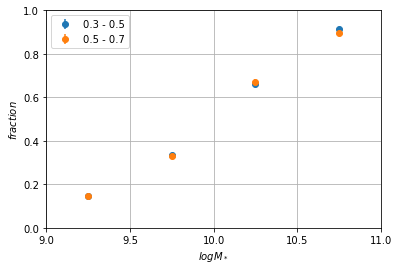

In [70]:
massbin_0 = 0.5 * (massbin[1:]+massbin[:-1])
plt.errorbar(massbin_0,frac_3_5_mass,err_3_5_mass,fmt = 'o',label = '0.3 - 0.5')
plt.errorbar(massbin_0,frac_5_7_mass,err_5_7_mass,fmt = 'o',label = '0.5 - 0.7')
plt.xlabel("$log M_*$")
plt.ylabel("$fraction$")
plt.xlim(9,11)
plt.xticks(np.arange(9,11.1,step = 0.5))
plt.ylim(0,1)
plt.legend()
plt.grid()